# Exploratory Data Analysis

In [1]:
# data analysis
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import StandardScaler

# statistical Libraries
from scipy import stats
from scipy.stats import norm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Mute warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 100)
sns.set_style("darkgrid")
%matplotlib inline

/kaggle/input/sample_submission.csv
/kaggle/input/data_description.txt
/kaggle/input/train.csv
/kaggle/input/test.csv


In [2]:
# load data
df_train = pd.read_csv('/kaggle/input/train.csv')
df_test = pd.read_csv('/kaggle/input/test.csv')

# combine to run certain operations on both datasets together
combine = [df_train, df_test]

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
df_train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
total_train = df_train.isnull().sum()
percent_train = ((df_train.isnull().sum()/df_train.isnull().count())*100)
missing_train = pd.concat([total_train, percent_train], axis=1, keys=['total_train', 'percent_train'])
print(missing_train[missing_train.sum(axis=1) > 0].round(2).sort_values(by=['total_train'],ascending=False))

              total_train  percent_train
PoolQC               1453          99.52
MiscFeature          1406          96.30
Alley                1369          93.77
Fence                1179          80.75
FireplaceQu           690          47.26
LotFrontage           259          17.74
GarageType             81           5.55
GarageYrBlt            81           5.55
GarageFinish           81           5.55
GarageQual             81           5.55
GarageCond             81           5.55
BsmtExposure           38           2.60
BsmtFinType2           38           2.60
BsmtFinType1           37           2.53
BsmtCond               37           2.53
BsmtQual               37           2.53
MasVnrArea              8           0.55
MasVnrType              8           0.55
Electrical              1           0.07


In [9]:
total_test = df_test.isnull().sum()
percent_test = ((df_test.isnull().sum()/df_test.isnull().count())*100)
missing_test = pd.concat([total_test, percent_test], axis=1, keys=['total_test', 'percent_test'])
print(missing_test[missing_test.sum(axis=1) > 0].round(2).sort_values(by=['total_test'],ascending=False))

              total_test  percent_test
PoolQC              1456         99.79
MiscFeature         1408         96.50
Alley               1352         92.67
Fence               1169         80.12
FireplaceQu          730         50.03
LotFrontage          227         15.56
GarageCond            78          5.35
GarageYrBlt           78          5.35
GarageQual            78          5.35
GarageFinish          78          5.35
GarageType            76          5.21
BsmtCond              45          3.08
BsmtExposure          44          3.02
BsmtQual              44          3.02
BsmtFinType1          42          2.88
BsmtFinType2          42          2.88
MasVnrType            16          1.10
MasVnrArea            15          1.03
MSZoning               4          0.27
BsmtFullBath           2          0.14
BsmtHalfBath           2          0.14
Functional             2          0.14
Utilities              2          0.14
GarageCars             1          0.07
GarageArea             1 

In [10]:
numerical = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
print(numerical)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [11]:
categorical = [f for f in df_train.columns if df_train.dtypes[f] == 'object']
print(categorical)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Numerical Features

**Features Overview**

**Categorical.**
* 43 features.

**Numerical.**
* 38 features.
    
**Missing data.** 
* 19 features with missing values on train data sample and 33 features with missing values on test data sample.

**Numerical feature analysis.**

* Descriptive statistics
* Observations
* Central tendency
* Dispersion
* Shape
    * MSSubClass - Approximately 50% of the houses are 1 story or 1.5 story
    * MasVnrArea -  All the values are 0 below 50%.
    * LotFrontage - Presence of outliers, since the data are spread between 59(25%) and 80(75%) and the max value are 313.
    * LotArea - Rich presence of outliers. Very small range around the center of the distribution compared to the min and max values of data points.
    * 


In [12]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

**Univariate analysis**

     count   mean         std  min     25%    50%      75%     max
Id  1460.0  730.5  421.610009  1.0  365.75  730.5  1095.25  1460.0


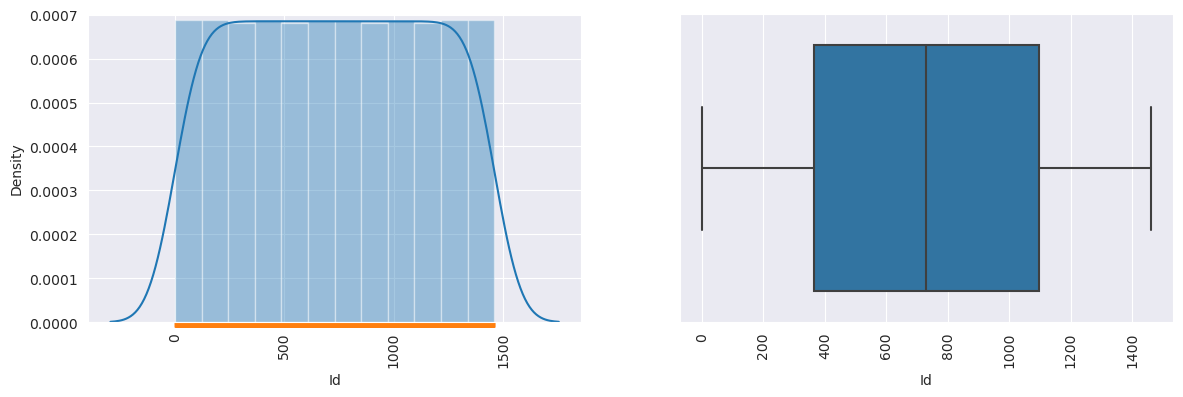

             count      mean        std   min   25%   50%   75%    max
MSSubClass  1460.0  56.89726  42.300571  20.0  20.0  50.0  70.0  190.0


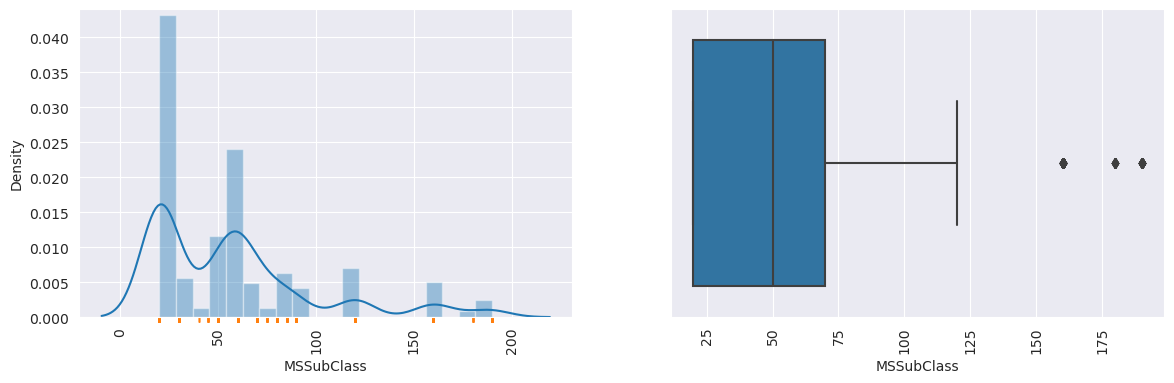

              count       mean        std   min   25%   50%   75%    max
LotFrontage  1201.0  70.049958  24.284752  21.0  59.0  69.0  80.0  313.0


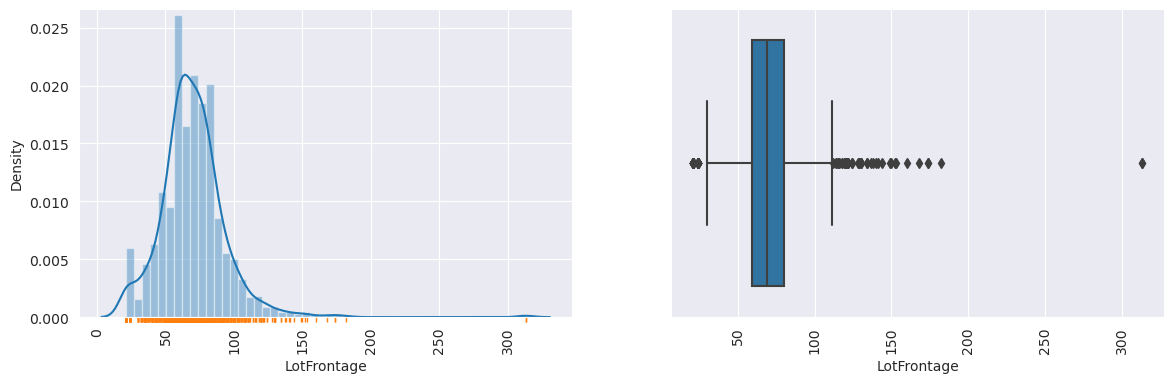

          count          mean          std     min     25%     50%      75%  \
LotArea  1460.0  10516.828082  9981.264932  1300.0  7553.5  9478.5  11601.5   

              max  
LotArea  215245.0  


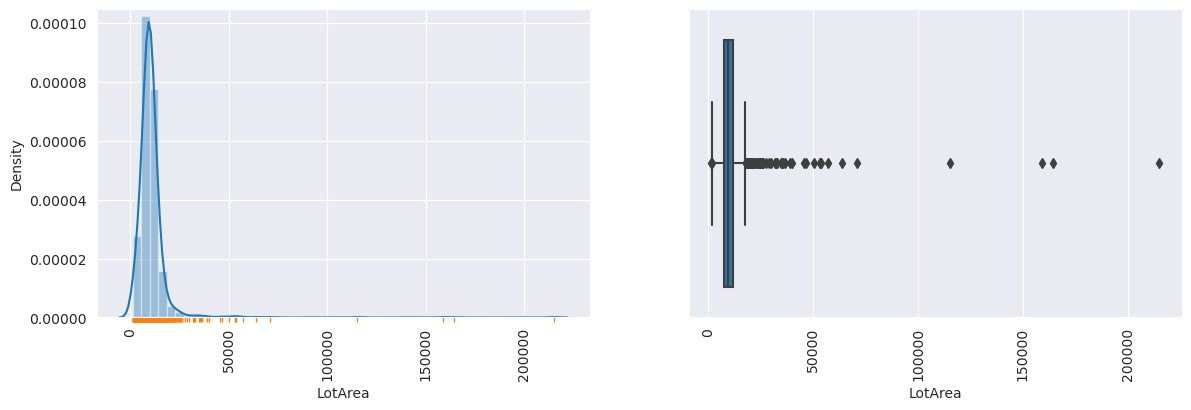

              count      mean       std  min  25%  50%  75%   max
OverallQual  1460.0  6.099315  1.382997  1.0  5.0  6.0  7.0  10.0


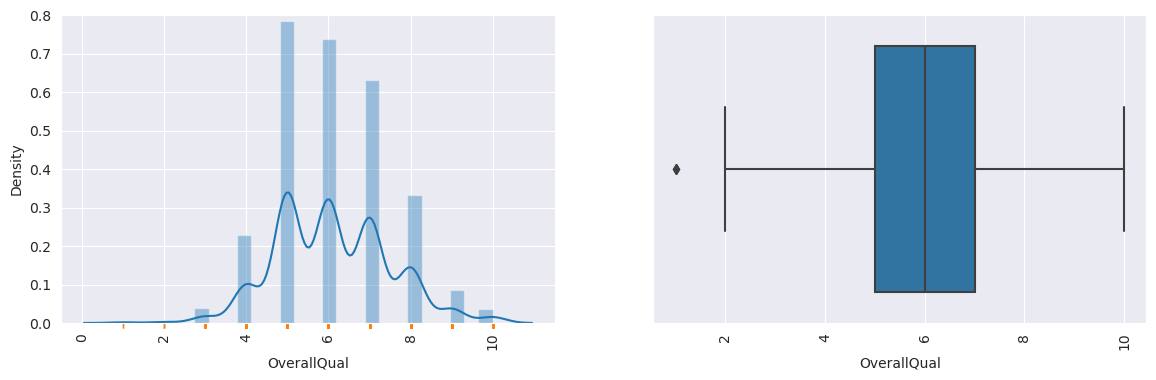

              count      mean       std  min  25%  50%  75%  max
OverallCond  1460.0  5.575342  1.112799  1.0  5.0  5.0  6.0  9.0


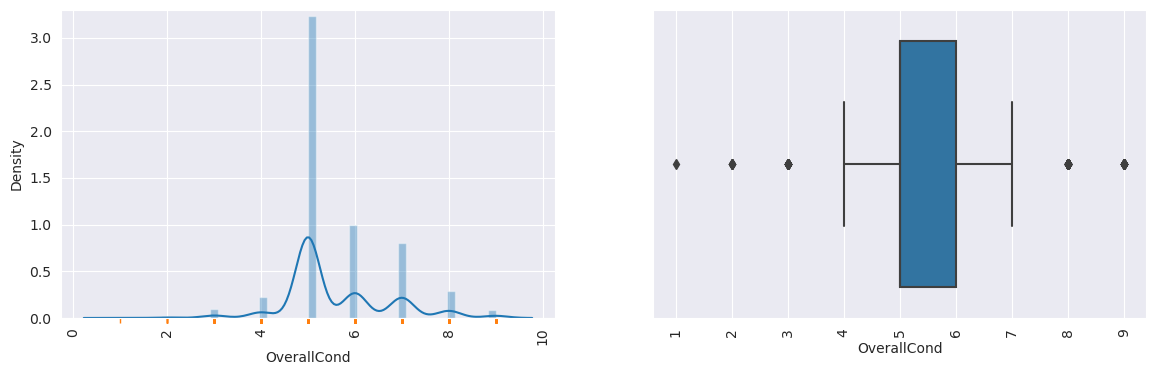

            count         mean        std     min     25%     50%     75%  \
YearBuilt  1460.0  1971.267808  30.202904  1872.0  1954.0  1973.0  2000.0   

              max  
YearBuilt  2010.0  


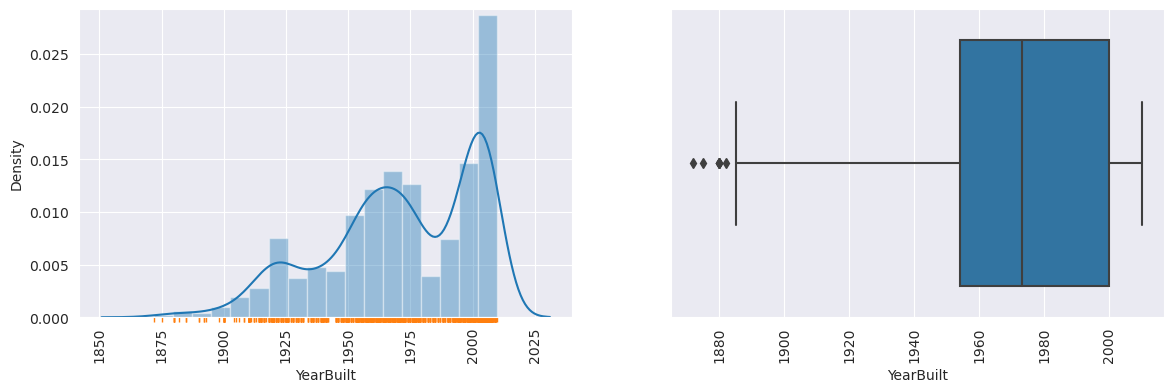

               count         mean        std     min     25%     50%     75%  \
YearRemodAdd  1460.0  1984.865753  20.645407  1950.0  1967.0  1994.0  2004.0   

                 max  
YearRemodAdd  2010.0  


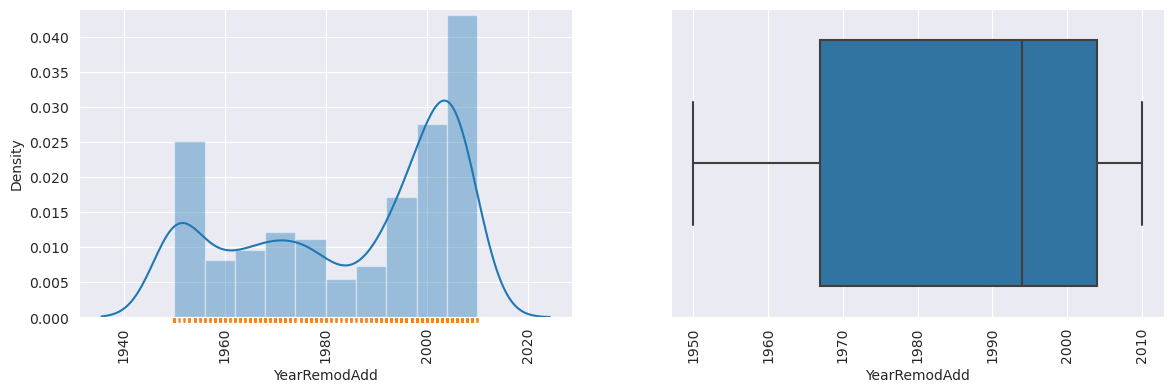

             count        mean         std  min  25%  50%    75%     max
MasVnrArea  1452.0  103.685262  181.066207  0.0  0.0  0.0  166.0  1600.0


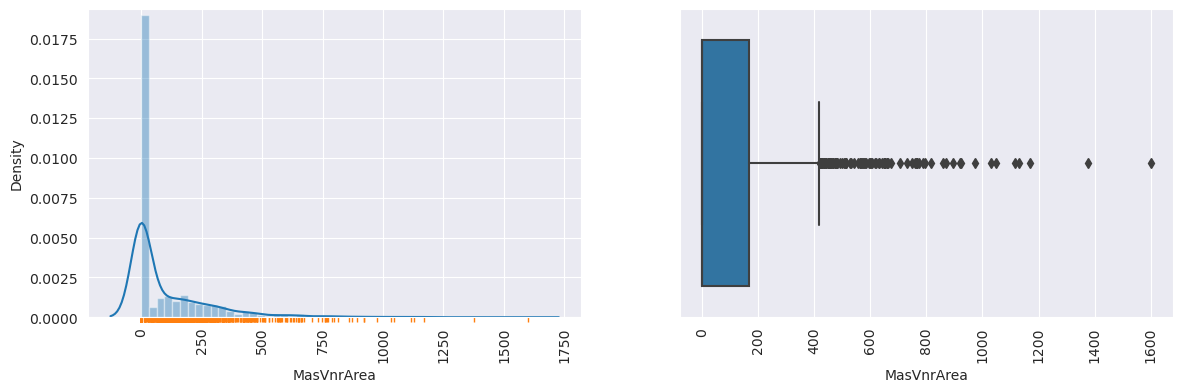

             count        mean         std  min  25%    50%     75%     max
BsmtFinSF1  1460.0  443.639726  456.098091  0.0  0.0  383.5  712.25  5644.0


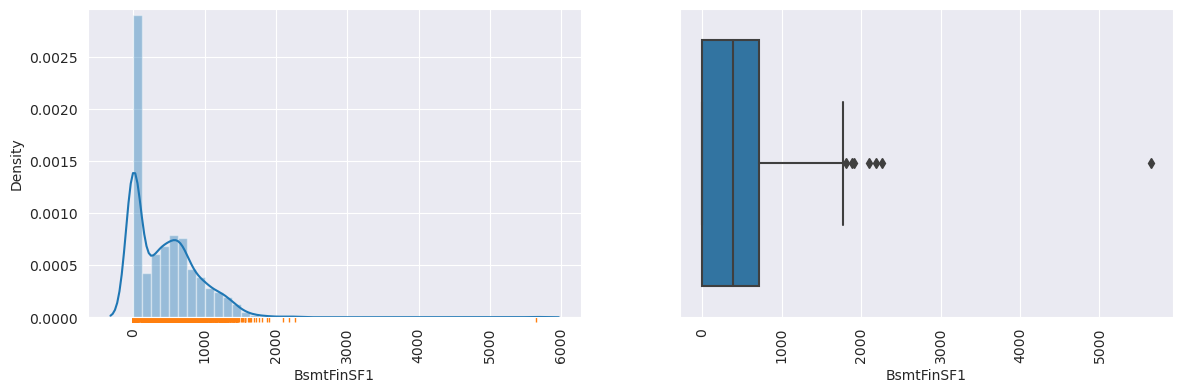

             count       mean         std  min  25%  50%  75%     max
BsmtFinSF2  1460.0  46.549315  161.319273  0.0  0.0  0.0  0.0  1474.0


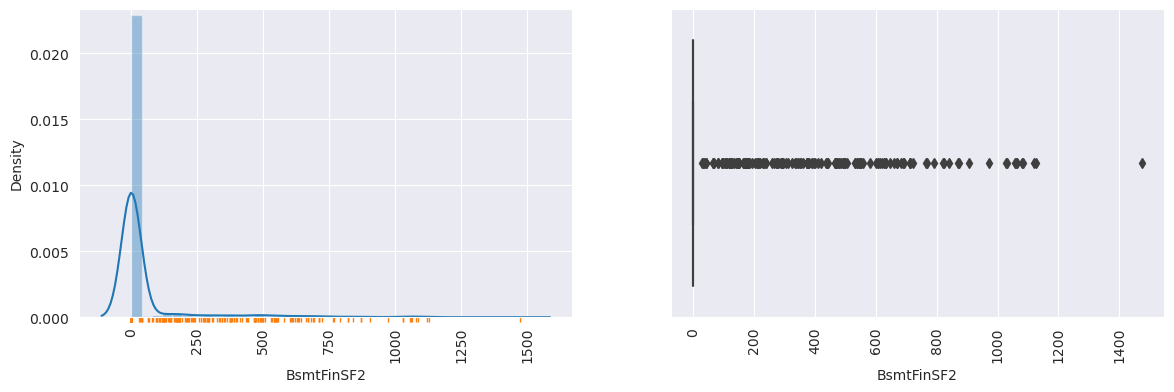

            count        mean         std  min    25%    50%    75%     max
BsmtUnfSF  1460.0  567.240411  441.866955  0.0  223.0  477.5  808.0  2336.0


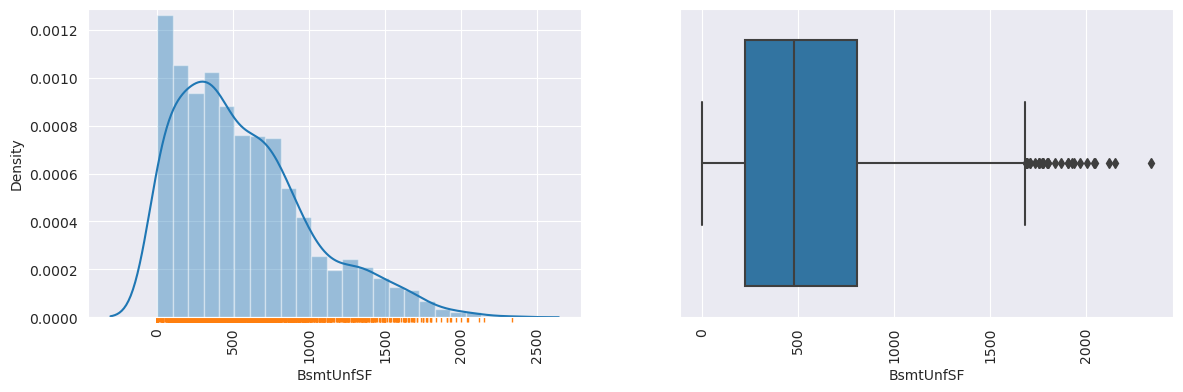

              count         mean         std  min     25%    50%      75%  \
TotalBsmtSF  1460.0  1057.429452  438.705324  0.0  795.75  991.5  1298.25   

                max  
TotalBsmtSF  6110.0  


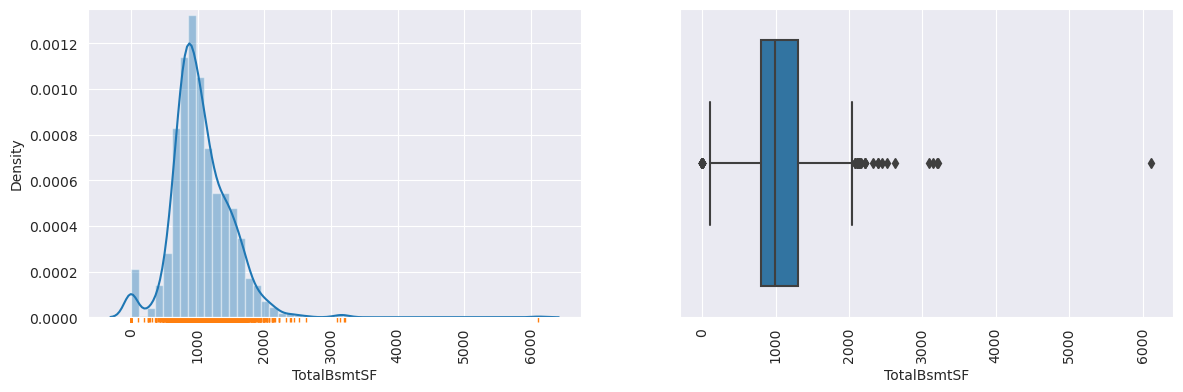

           count         mean         std    min    25%     50%      75%  \
1stFlrSF  1460.0  1162.626712  386.587738  334.0  882.0  1087.0  1391.25   

             max  
1stFlrSF  4692.0  


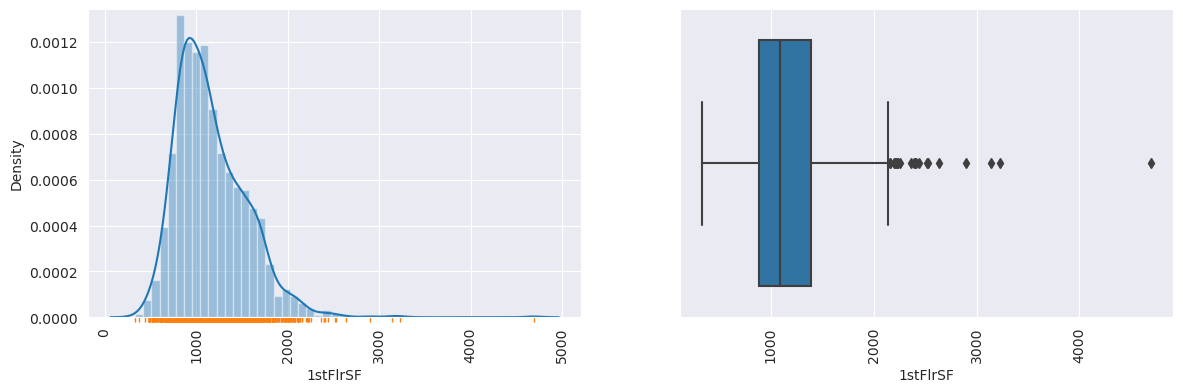

           count        mean         std  min  25%  50%    75%     max
2ndFlrSF  1460.0  346.992466  436.528436  0.0  0.0  0.0  728.0  2065.0


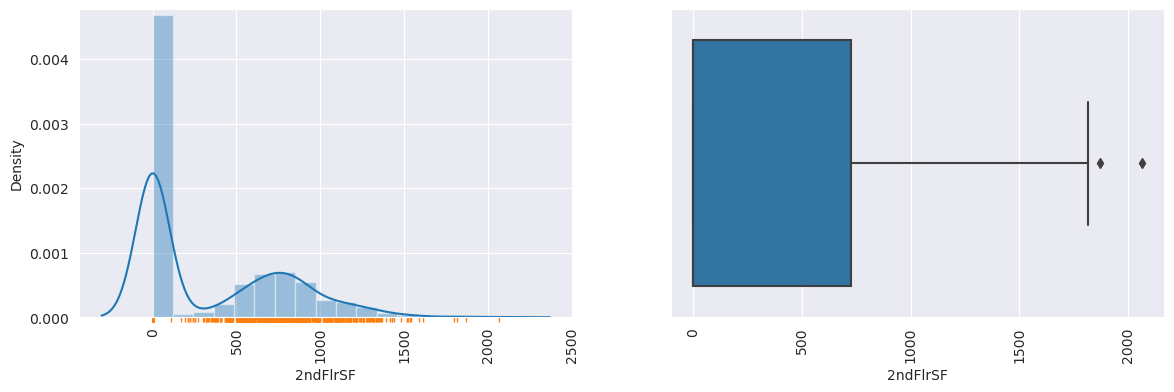

               count      mean        std  min  25%  50%  75%    max
LowQualFinSF  1460.0  5.844521  48.623081  0.0  0.0  0.0  0.0  572.0


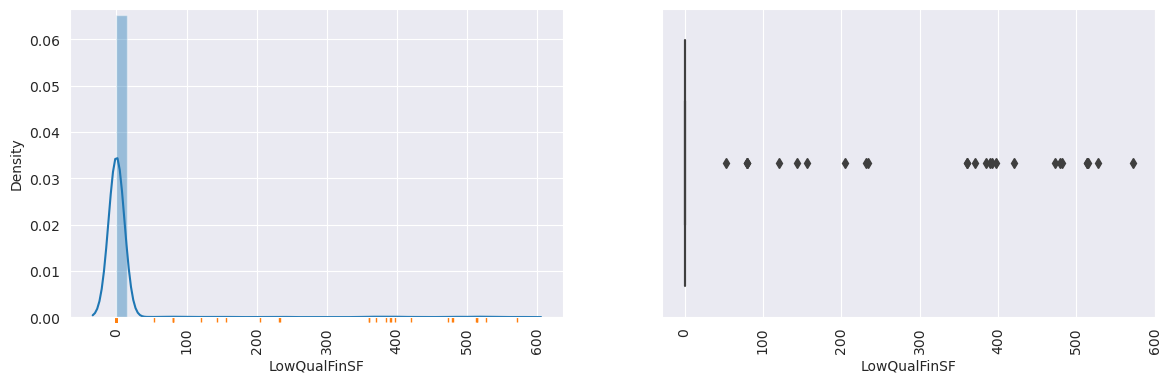

            count         mean         std    min     25%     50%      75%  \
GrLivArea  1460.0  1515.463699  525.480383  334.0  1129.5  1464.0  1776.75   

              max  
GrLivArea  5642.0  


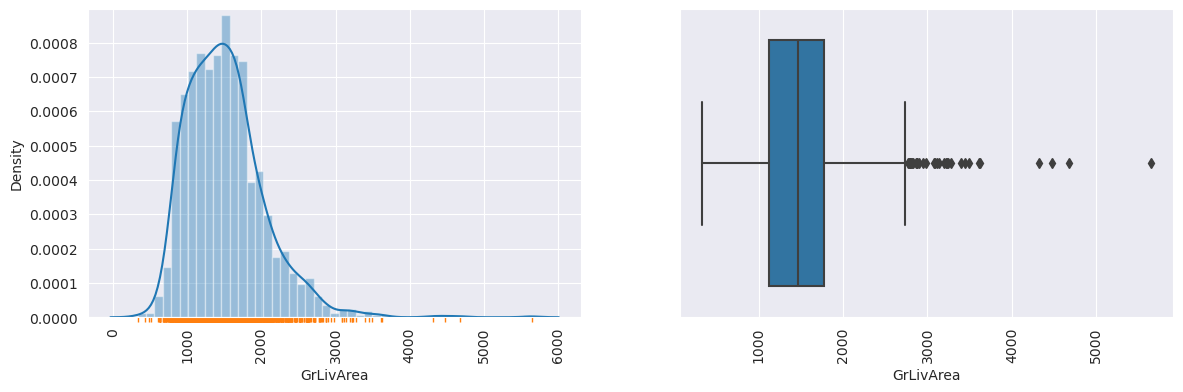

               count      mean       std  min  25%  50%  75%  max
BsmtFullBath  1460.0  0.425342  0.518911  0.0  0.0  0.0  1.0  3.0


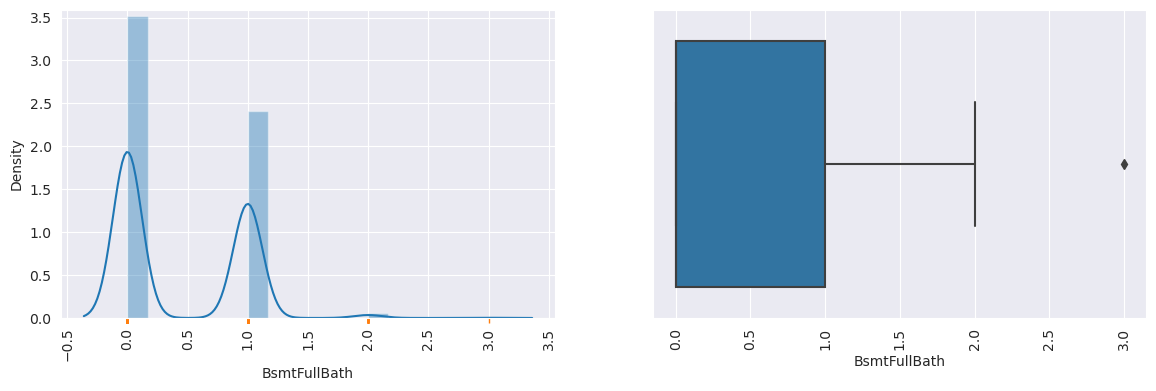

               count      mean       std  min  25%  50%  75%  max
BsmtHalfBath  1460.0  0.057534  0.238753  0.0  0.0  0.0  0.0  2.0


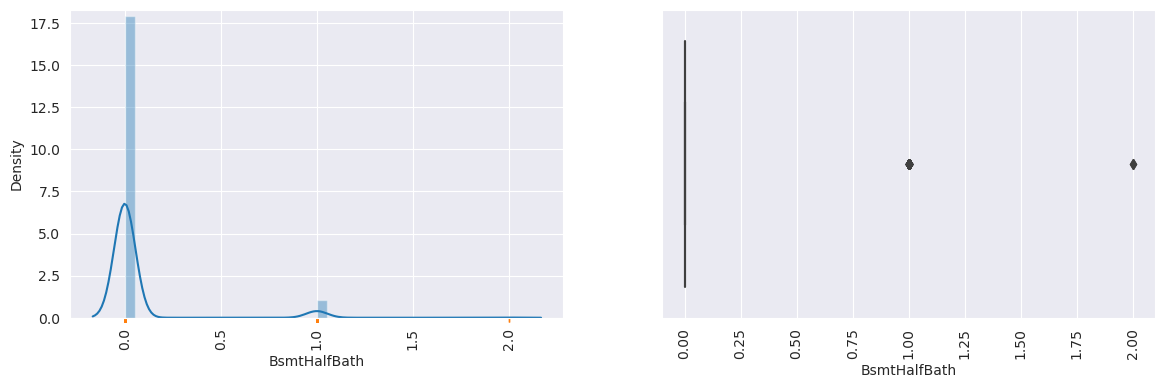

           count      mean       std  min  25%  50%  75%  max
FullBath  1460.0  1.565068  0.550916  0.0  1.0  2.0  2.0  3.0


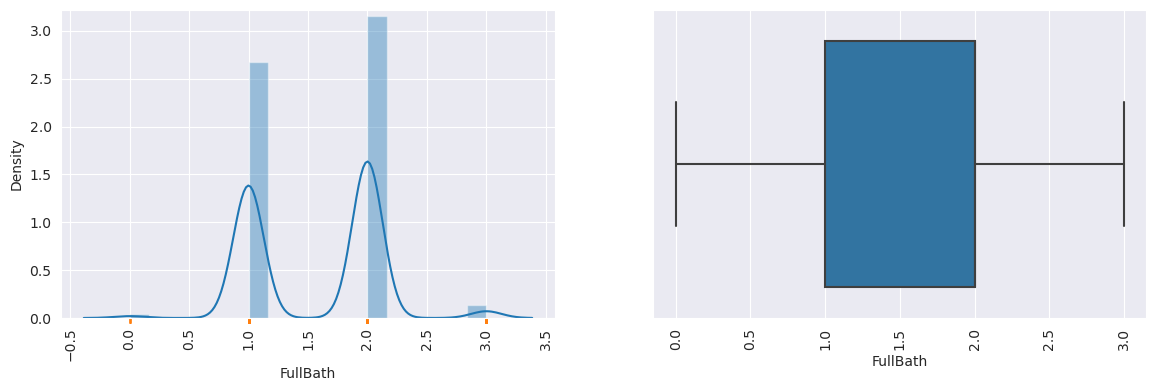

           count      mean       std  min  25%  50%  75%  max
HalfBath  1460.0  0.382877  0.502885  0.0  0.0  0.0  1.0  2.0


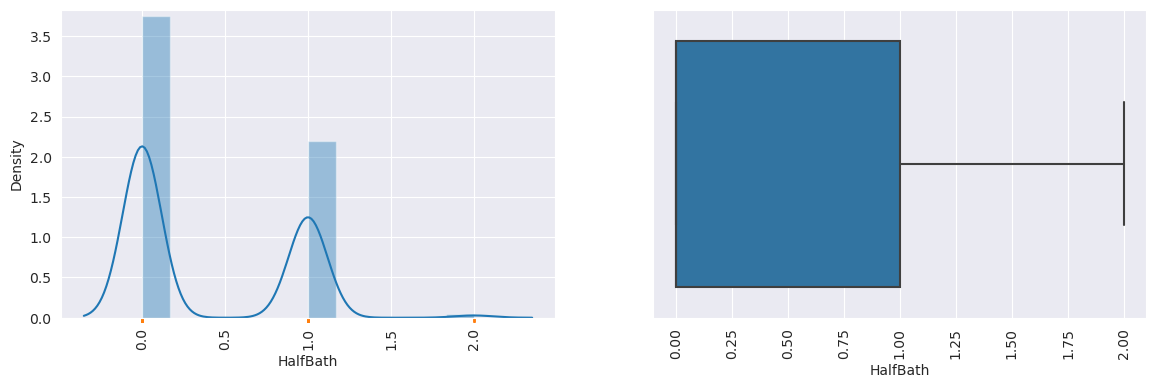

               count      mean       std  min  25%  50%  75%  max
BedroomAbvGr  1460.0  2.866438  0.815778  0.0  2.0  3.0  3.0  8.0


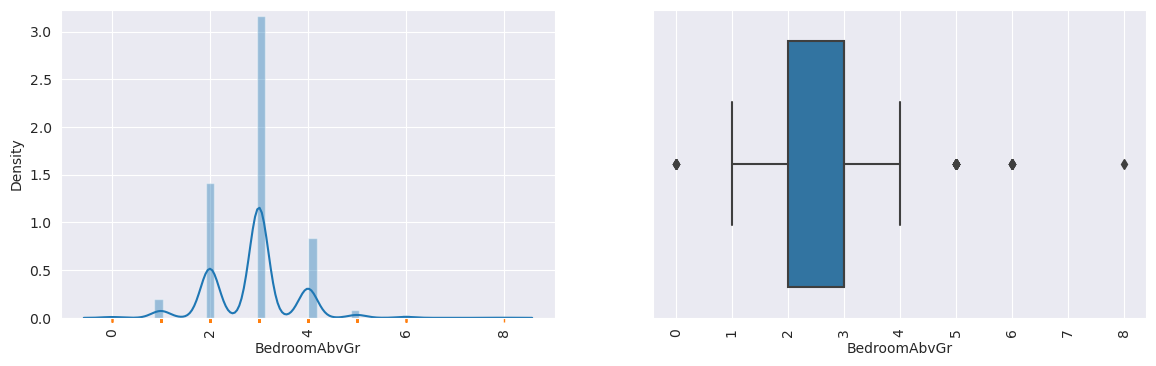

               count      mean       std  min  25%  50%  75%  max
KitchenAbvGr  1460.0  1.046575  0.220338  0.0  1.0  1.0  1.0  3.0


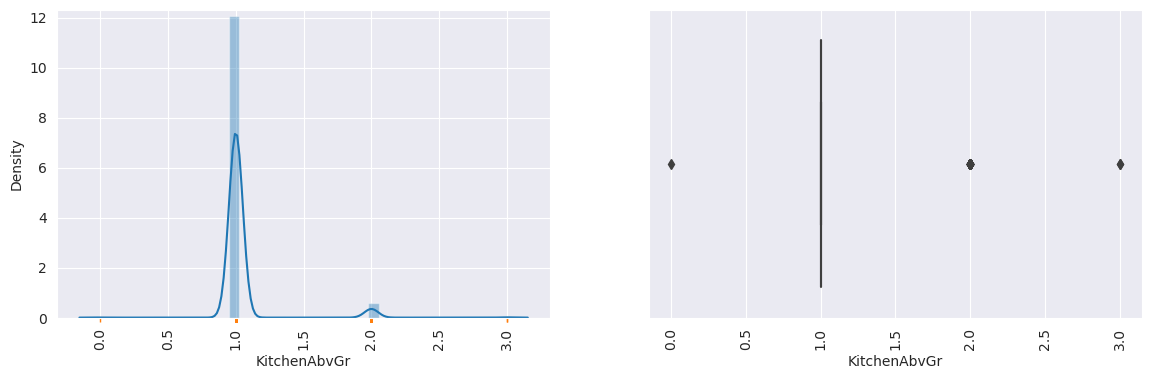

               count      mean       std  min  25%  50%  75%   max
TotRmsAbvGrd  1460.0  6.517808  1.625393  2.0  5.0  6.0  7.0  14.0


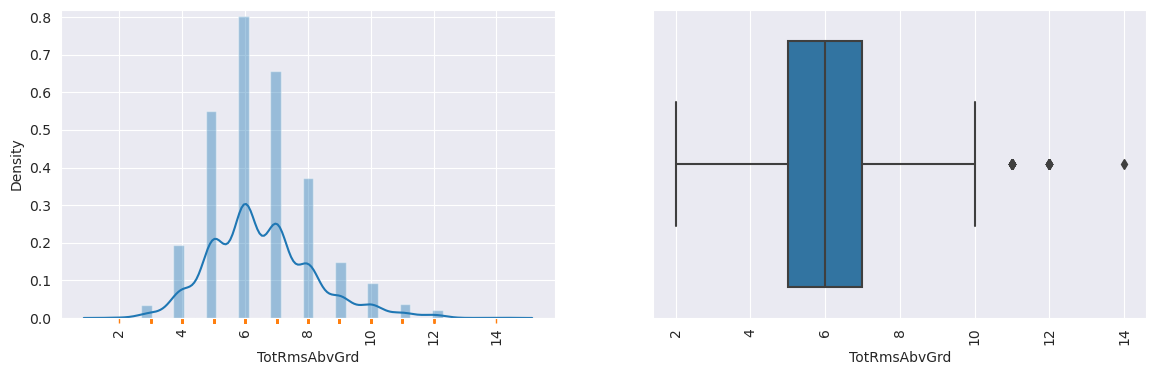

             count      mean       std  min  25%  50%  75%  max
Fireplaces  1460.0  0.613014  0.644666  0.0  0.0  1.0  1.0  3.0


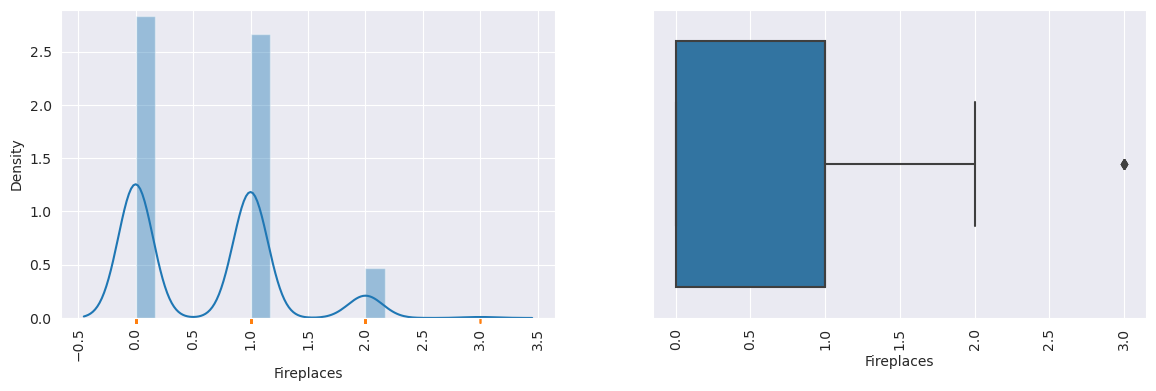

              count         mean        std     min     25%     50%     75%  \
GarageYrBlt  1379.0  1978.506164  24.689725  1900.0  1961.0  1980.0  2002.0   

                max  
GarageYrBlt  2010.0  


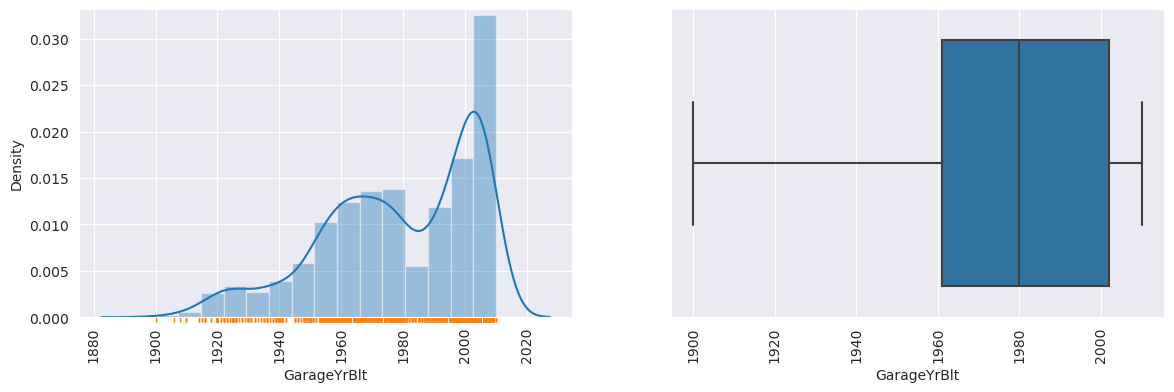

             count      mean       std  min  25%  50%  75%  max
GarageCars  1460.0  1.767123  0.747315  0.0  1.0  2.0  2.0  4.0


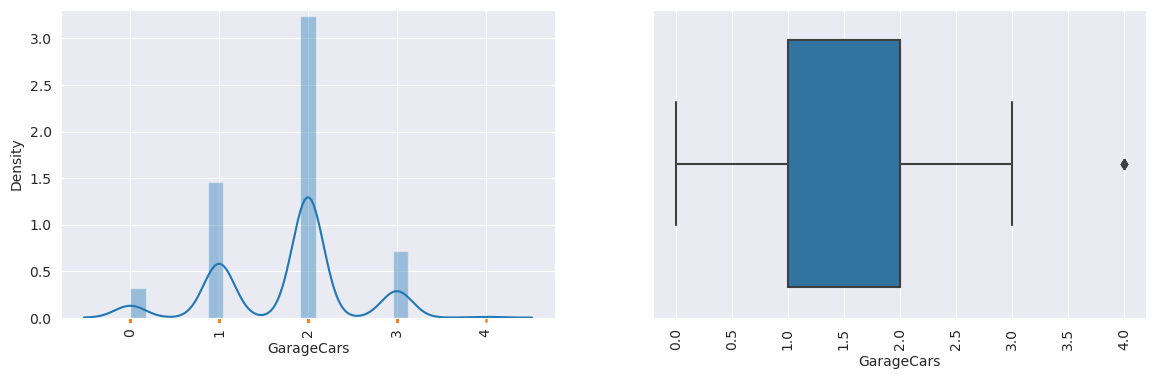

             count        mean         std  min    25%    50%    75%     max
GarageArea  1460.0  472.980137  213.804841  0.0  334.5  480.0  576.0  1418.0


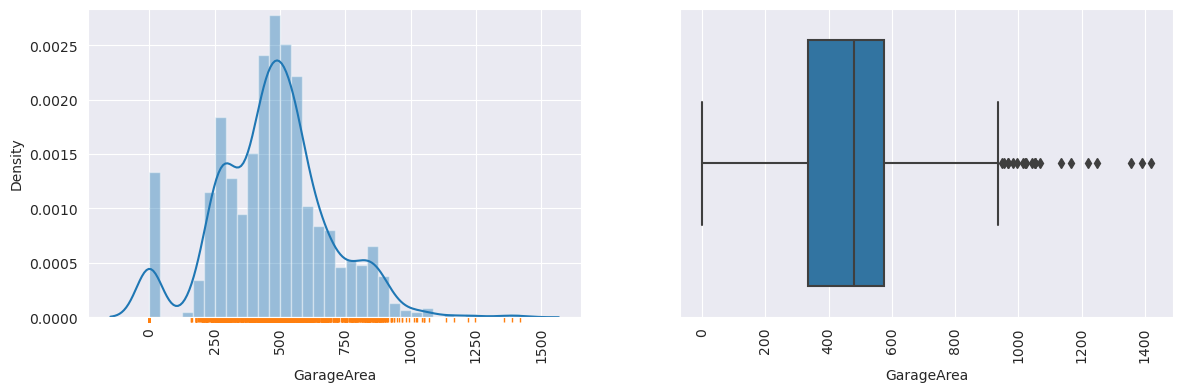

             count       mean         std  min  25%  50%    75%    max
WoodDeckSF  1460.0  94.244521  125.338794  0.0  0.0  0.0  168.0  857.0


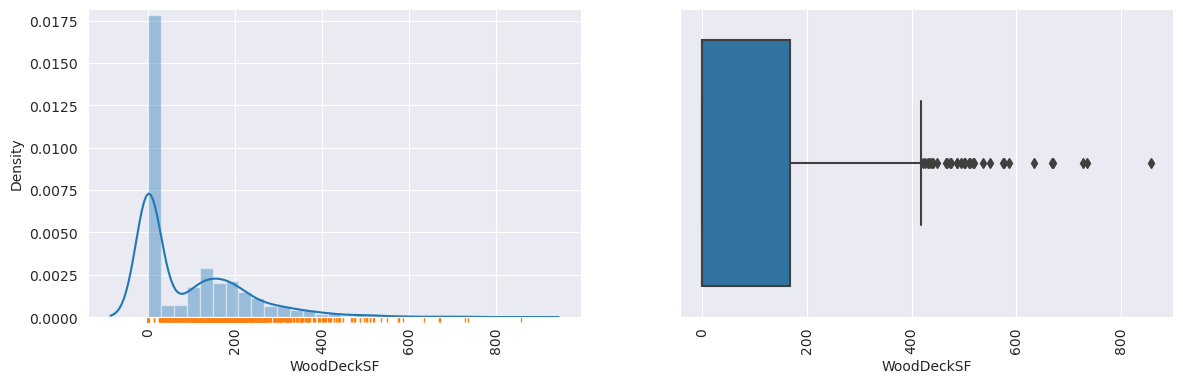

              count       mean        std  min  25%   50%   75%    max
OpenPorchSF  1460.0  46.660274  66.256028  0.0  0.0  25.0  68.0  547.0


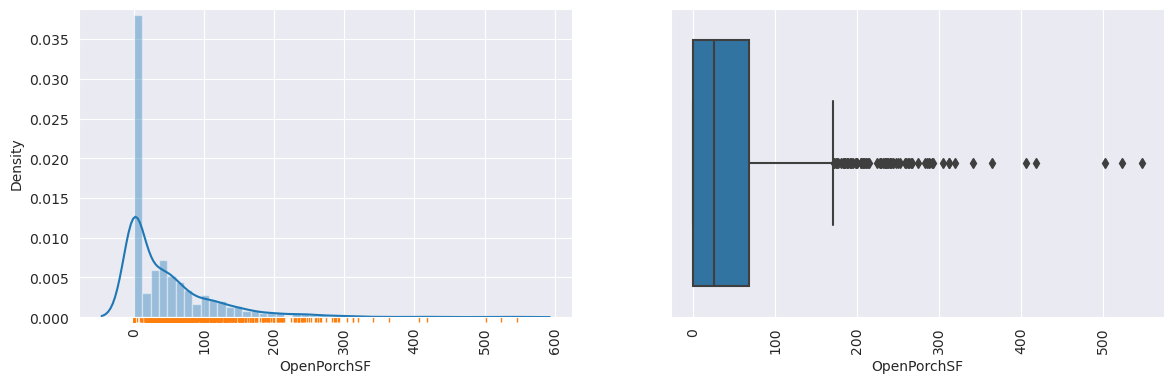

                count      mean        std  min  25%  50%  75%    max
EnclosedPorch  1460.0  21.95411  61.119149  0.0  0.0  0.0  0.0  552.0


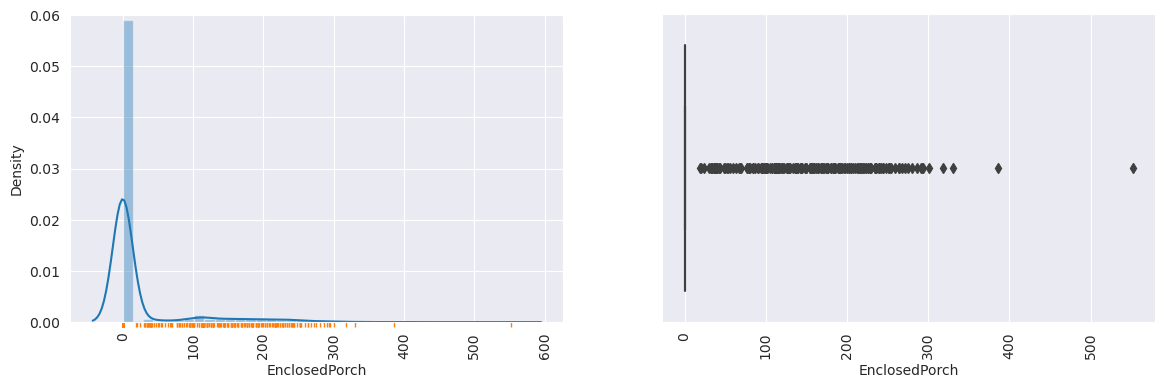

            count      mean        std  min  25%  50%  75%    max
3SsnPorch  1460.0  3.409589  29.317331  0.0  0.0  0.0  0.0  508.0


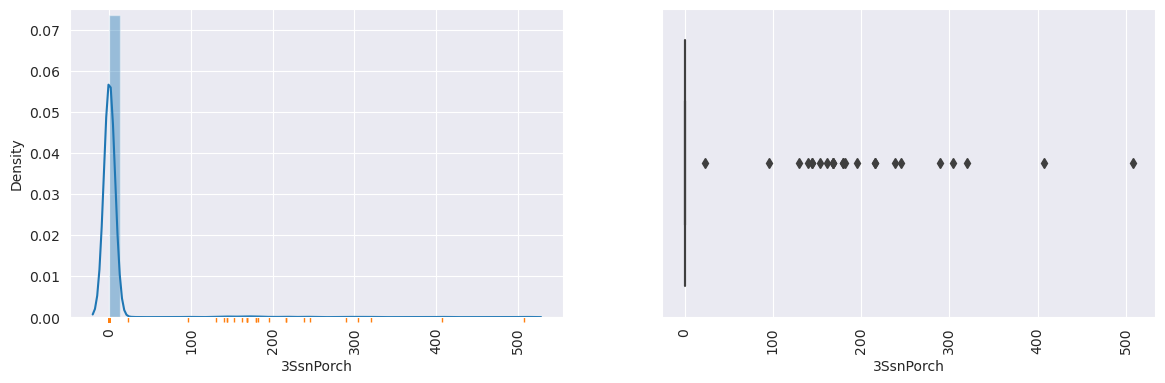

              count       mean        std  min  25%  50%  75%    max
ScreenPorch  1460.0  15.060959  55.757415  0.0  0.0  0.0  0.0  480.0


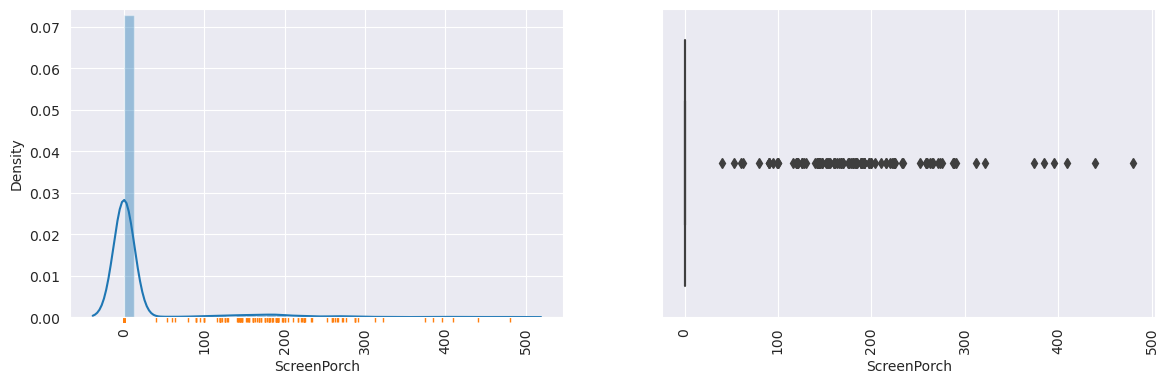

           count      mean        std  min  25%  50%  75%    max
PoolArea  1460.0  2.758904  40.177307  0.0  0.0  0.0  0.0  738.0


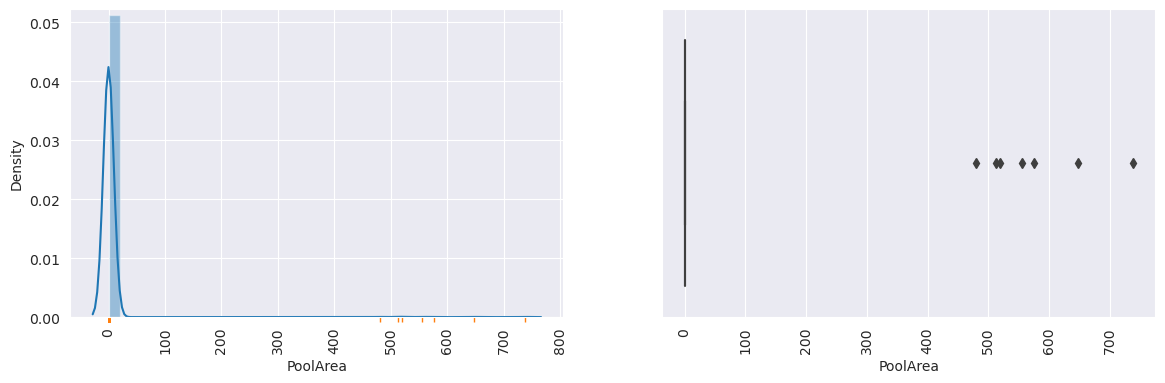

          count       mean         std  min  25%  50%  75%      max
MiscVal  1460.0  43.489041  496.123024  0.0  0.0  0.0  0.0  15500.0


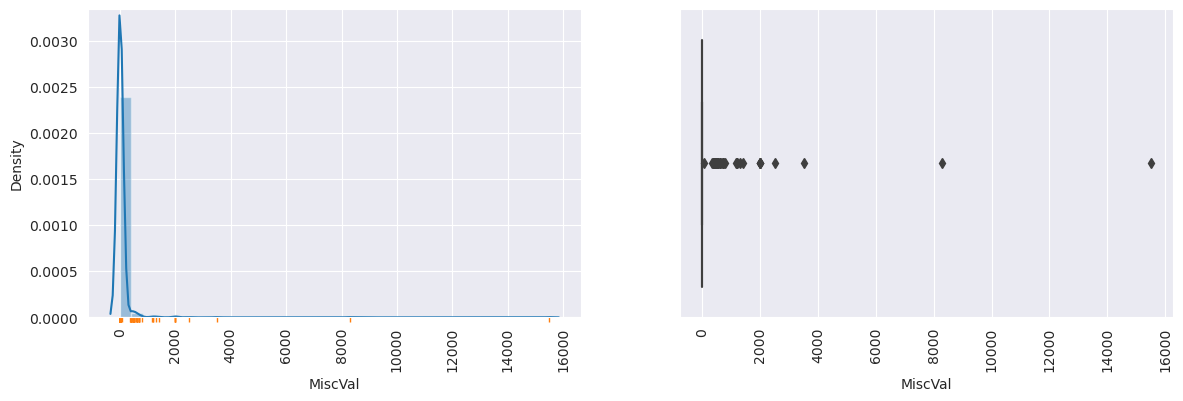

         count      mean       std  min  25%  50%  75%   max
MoSold  1460.0  6.321918  2.703626  1.0  5.0  6.0  8.0  12.0


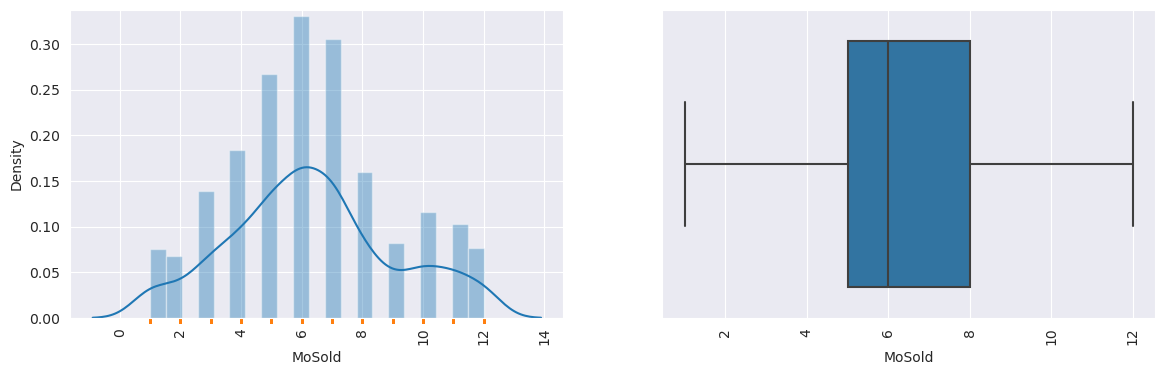

         count         mean       std     min     25%     50%     75%     max
YrSold  1460.0  2007.815753  1.328095  2006.0  2007.0  2008.0  2009.0  2010.0


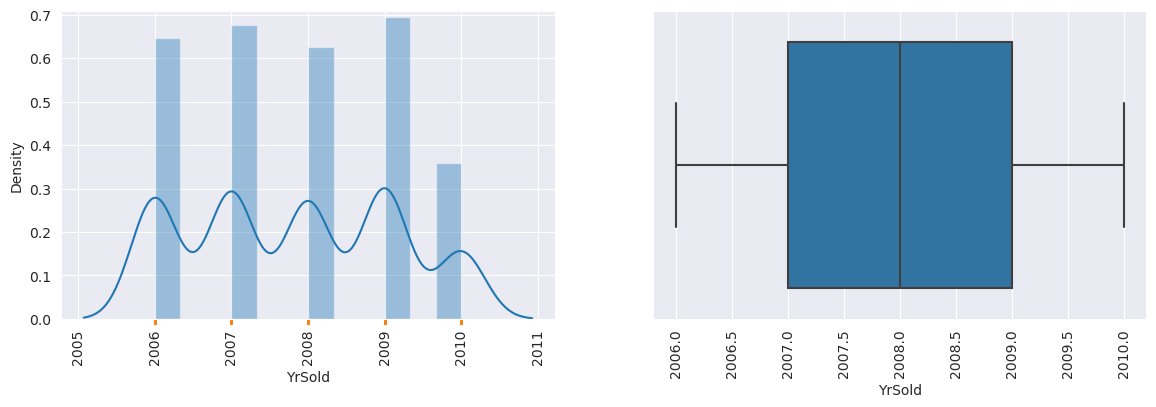

            count          mean           std      min       25%       50%  \
SalePrice  1460.0  180921.19589  79442.502883  34900.0  129975.0  163000.0   

                75%       max  
SalePrice  214000.0  755000.0  


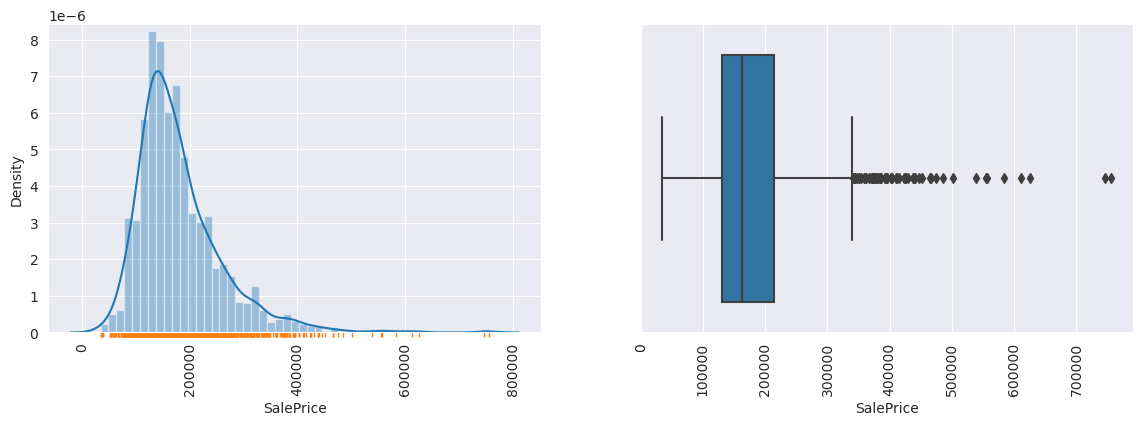

In [13]:
columns = numerical

for i, feature in enumerate(columns):
    
    print(df_train[feature].describe().to_frame().T)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
    
    sns.distplot(df_train[feature].dropna(),rug=True,
                 rug_kws={"color":"tab:orange",'height':-0.015,'clip_on':False},ax = ax1)
    ax1.tick_params(axis='x', rotation=90)
      
    sns.boxplot(data=df_train, x=feature,ax = ax2)
    ax2.tick_params(axis='x', rotation=90)
    
    plt.show()
plt.show()

**Bivariate analysis**

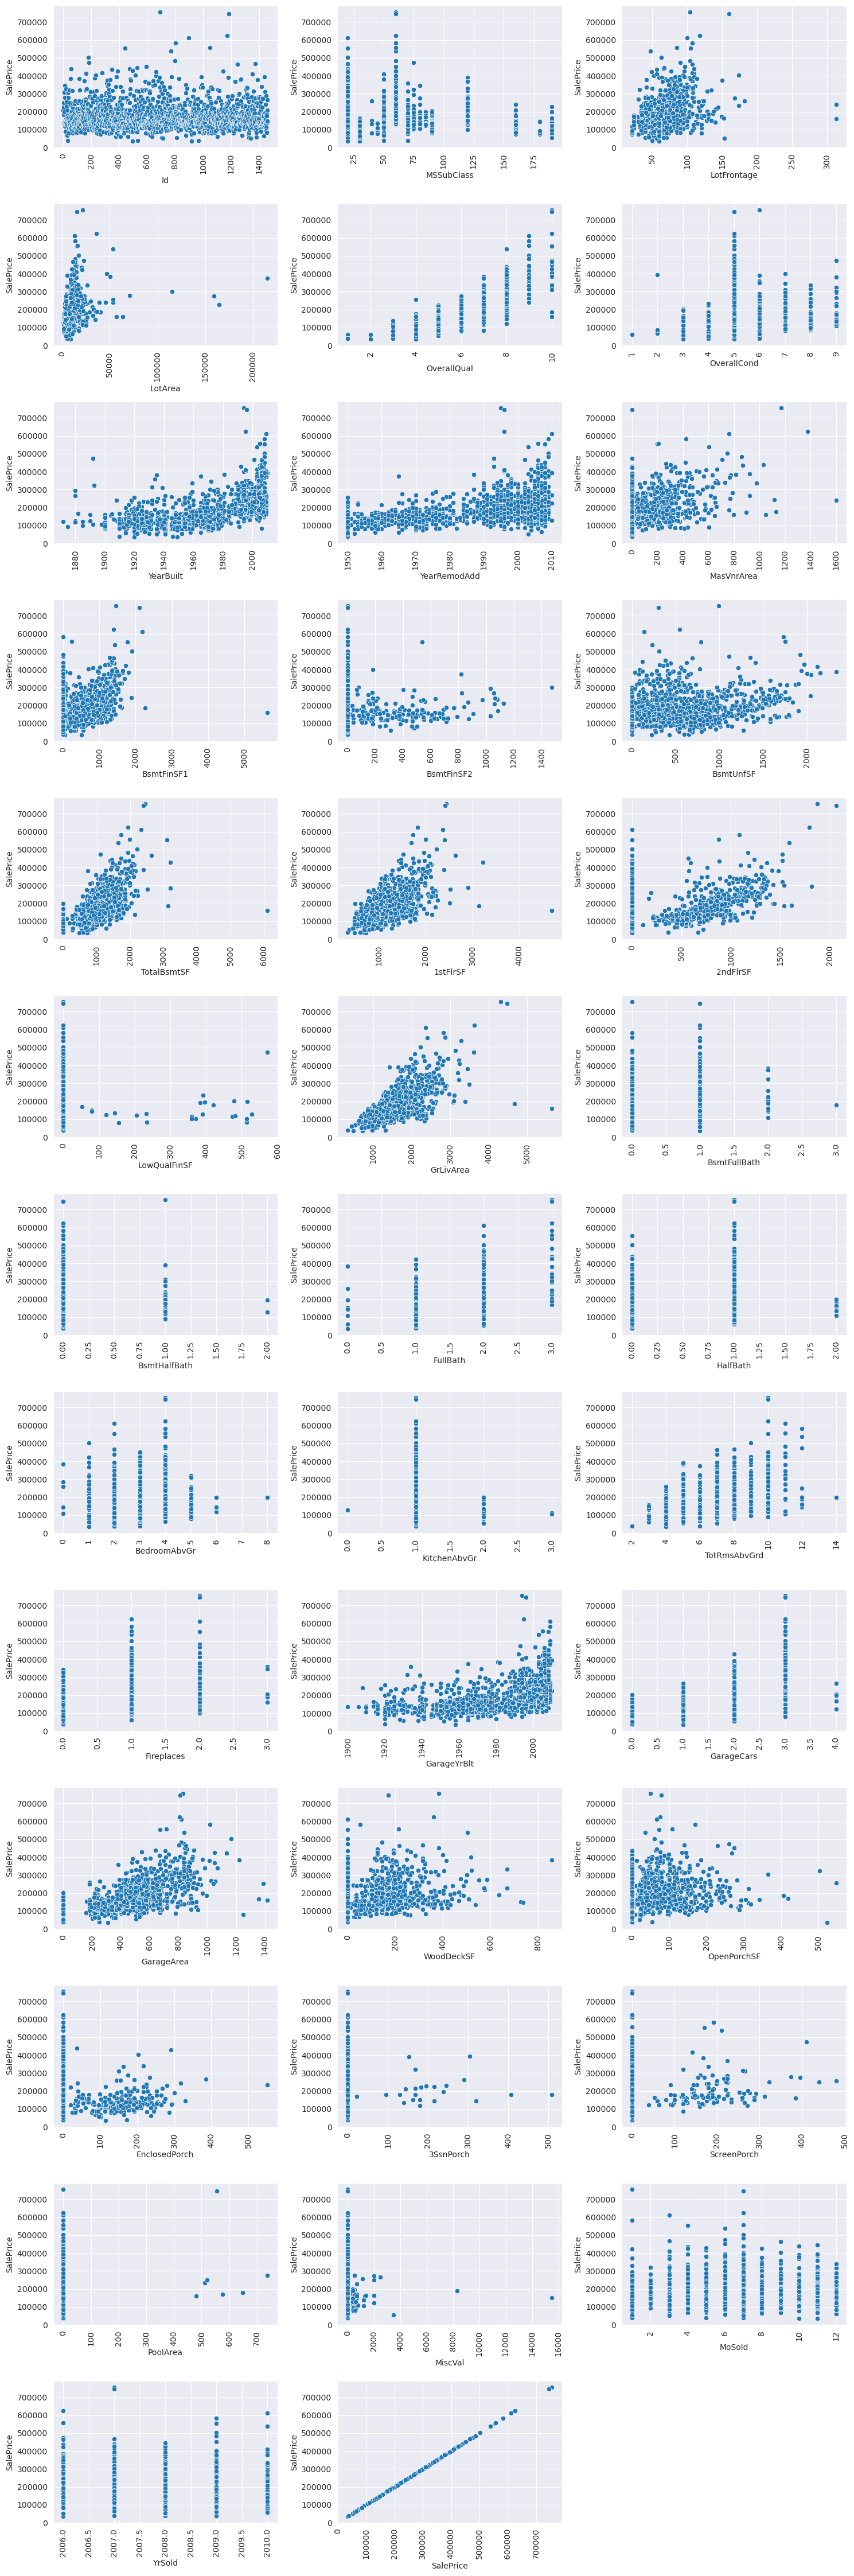

In [14]:
columns = numerical

plt.figure(figsize=(15, 45))

for i, feature in enumerate(columns):
    plt.subplot(13, 3, i+1)
    sns.scatterplot(data=df_train, x=feature, y='SalePrice')
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

**Multivaraite analysis**

In [15]:
correlation = df_train.corr()

In [16]:
sale_price_correlation = correlation['SalePrice'].sort_values(ascending=False)
sale_price_correlation

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

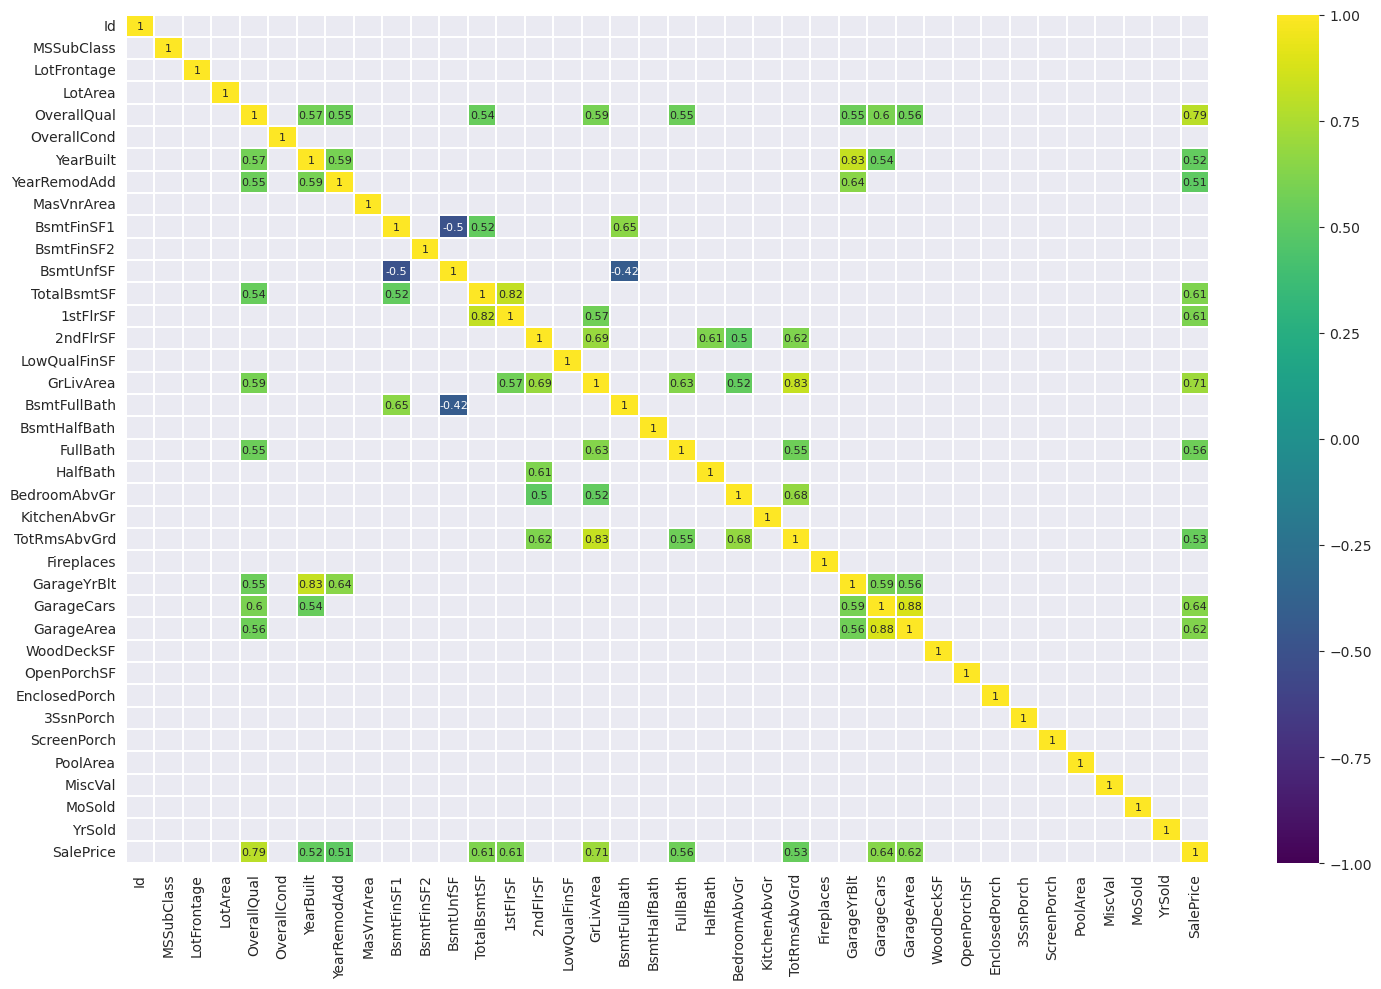

In [17]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation[(correlation >= 0.5) | (correlation <= -0.4)],
            annot=True,linewidths=0.1,annot_kws={"size": 8},vmax=1.0,vmin=-1.0,cmap='viridis')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

## Categorical Features

In [18]:
df_train.describe(include=object)

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

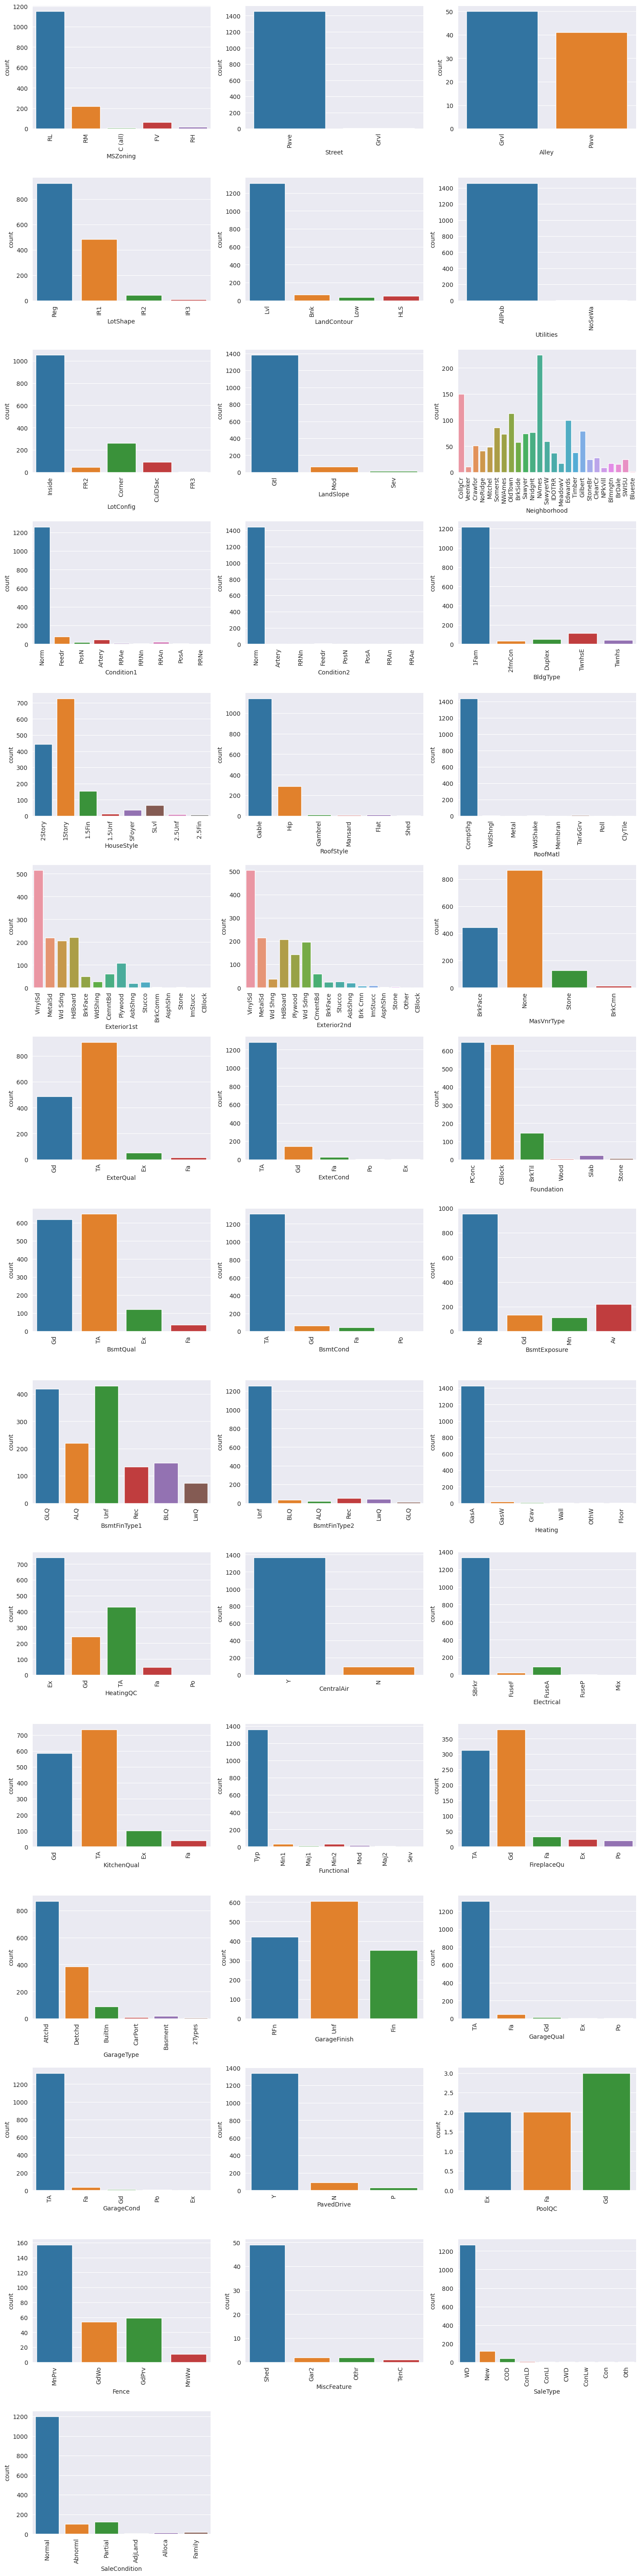

In [19]:
columns = categorical

plt.figure(figsize=(15, 60))

for i, feature in enumerate(columns):
    plt.subplot(15, 3, i+1)
    sns.countplot(data=df_train, x=feature)
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

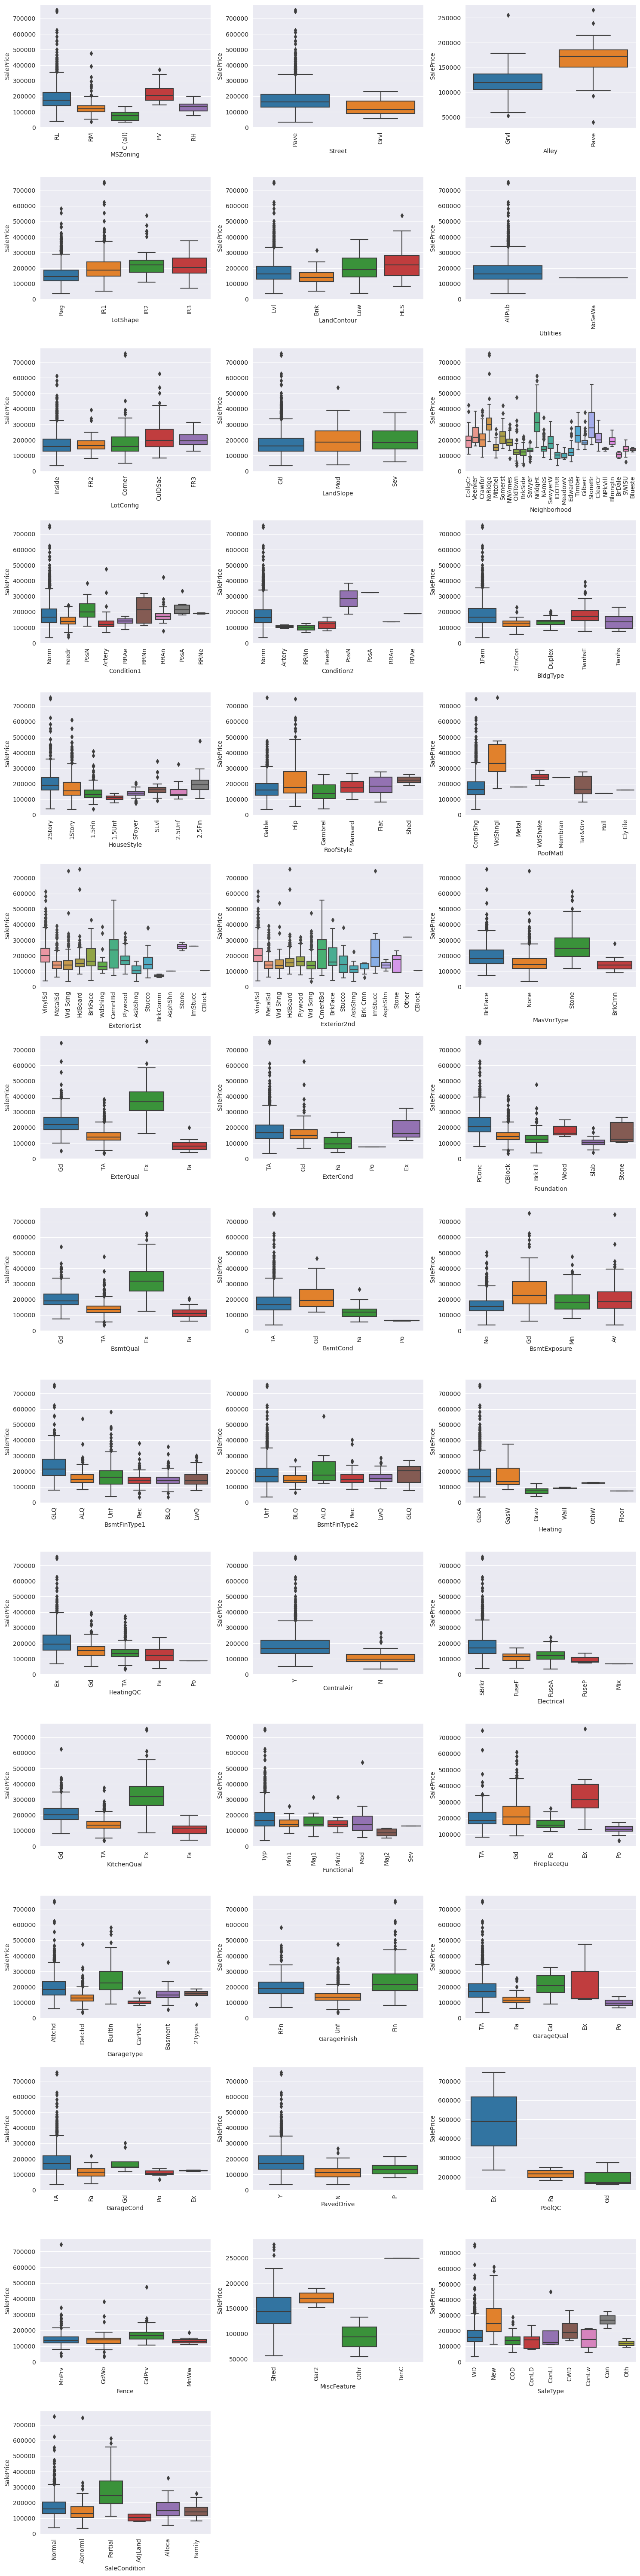

In [20]:
columns = categorical

plt.figure(figsize=(15, 60))

for i, feature in enumerate(columns):
    plt.subplot(15, 3, i+1)
    sns.boxplot(data=df_train, x=feature, y='SalePrice')
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()